HORACIOBUENOMORALES_PROYECTO_COVID_ MÉXICO_2020  
Análisis de la evolución del COVID en México.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv('Datos_covid.csv',parse_dates=['FECHA_ACTUALIZACION','FECHA_INGRESO','FECHA_SINTOMAS','FECHA_DEF'],encoding='latin1')

C:\Users\52552\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data.loc[data.FECHA_DEF == "9999-99-99", "FECHA_DEF"] = np.nan
data["FECHA_DEF"] = pd.to_datetime(data["FECHA_DEF"], format = "%Y/%m/%d")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393714 entries, 0 to 393713
Data columns (total 67 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Unnamed: 0                393714 non-null  int64         
 1   UCI                       393714 non-null  int64         
 2   MIGRANTE                  393714 non-null  int64         
 3   RESULTADO                 393714 non-null  int64         
 4   OTRO_CASO                 393714 non-null  int64         
 5   TABAQUISMO                393714 non-null  int64         
 6   RENAL_CRONICA             393714 non-null  int64         
 7   OBESIDAD                  393714 non-null  int64         
 8   CARDIOVASCULAR            393714 non-null  int64         
 9   OTRAS_COM                 393714 non-null  int64         
 10  HIPERTENSION              393714 non-null  int64         
 11  INMUSUPR                  393714 non-null  int64         
 12  AS

In [6]:
################## DEFINIMOS SI EL PACIENTE TIENE O NO COVID ##################
def no(data):
    if data['RESULTADO'] == 2:
        val = 1
    else:
        val = 0
    return val

def si(data):
    if data['RESULTADO'] == 1:
        val = 1
    else:
        val = 0
    return val

def sin(data):
    if data['RESULTADO'] == 3:
        val = 1
    else:
        val = 0
    return val

################## DEFINIMOS SI EL PACIENTE FALLECIÓ O NO ##################

def off(data):
    if data['FECHA_DEF'] <= datetime.now():
        val = 1
    else:
        val = 0
    return val
################## DEFINIMOS SI EL PACIENTE PRESENTA ALGUNA ENFERMEDAD ADEMÁS DE SER POSITIVO EN COVID ##################

def tabaquismo(data):
    if data['TABAQUISMO'] == 1:
        val = 1
    else:
        val = 0
    return val

def renal(data):
    if data['RENAL_CRONICA'] == 1:
        val = 1
    else:
        val = 0
    return val

def obesidad(data):
    if data['OBESIDAD'] == 1:
        val = 1
    else:
        val = 0
    return val

def cardio(data):
    if data['CARDIOVASCULAR'] == 1:
        val = 1
    else:
        val = 0
    return val

def otras(data):
    if data['OTRAS_COM'] == 1:
        val = 1
    else:
        val = 0
    return val

def hiper(data):
    if data['HIPERTENSION'] == 1:
        val = 1
    else:
        val = 0
    return val

def inmu(data):
    if data['INMUSUPR'] == 1:
        val = 1
    else:
        val = 0
    return val

def asma(data):
    if data['ASMA'] == 1:
        val = 1
    else:
        val = 0
    return val

def epoc(data):
    if data['EPOC'] == 1:
        val = 1
    else:
        val = 0
    return val

def diabetes(data):
    if data['DIABETES'] == 1:
        val = 1
    else:
        val = 0
    return val
################## DEFINIMOS SI EL PACIENTE CUENTA CON ALGUNA ENFERMEDAD Y ADEMÁS MUERE POR COVID ##################
def baja_tabaquismo(data):
    if data['TABAQUISMO'] == 1 and data['Fallecidos'] == 1:
        val = 1
    else:
        val = 0
    return val

def baja_renal(data):
    if data['RENAL_CRONICA'] == 1 and data['Fallecidos'] == 1:
        val = 1
    else:
        val = 0
    return val

def baja_obesidad(data):
    if data['OBESIDAD'] == 1 and data['Fallecidos'] == 1:
        val = 1
    else:
        val = 0
    return val

def baja_cardio(data):
    if data['CARDIOVASCULAR'] == 1 and data['Fallecidos'] == 1:
        val = 1
    else:
        val = 0
    return val

def baja_otras(data):
    if data['OTRAS_COM'] == 1 and data['Fallecidos'] == 1:
        val = 1
    else:
        val = 0
    return val

def baja_hiper(data):
    if data['HIPERTENSION'] == 1 and data['Fallecidos'] == 1:
        val = 1
    else:
        val = 0
    return val

def baja_inmu(data):
    if data['INMUSUPR'] == 1 and data['Fallecidos'] == 1:
        val = 1
    else:
        val = 0
    return val

def baja_asma(data):
    if data['ASMA'] == 1 and data['Fallecidos'] == 1:
        val = 1
    else:
        val = 0
    return val

def baja_epoc(data):
    if data['EPOC'] == 1 and data['Fallecidos'] == 1:
        val = 1
    else:
        val = 0
    return val

def baja_diabetes(data):
    if data['DIABETES'] == 1 and data['Fallecidos'] == 1:
        val = 1
    else:
        val = 0
    return val

In [7]:
################## AGREGAMOS COLUMNA DONDE SE MUESTRA SI EL PACIENTE TIENE O NO COVID ##################
data['No positivo SARS-CoV-2'] = data.apply(no, axis=1)
data['Positivo SARS-CoV-2'] = data.apply(si,axis=1)
data['Resultado pendiente'] = data.apply(sin, axis =1)

################## AGREGAMOS COLUMNA DONDE SE MUESTRA SI EL PACIENTE FALLECIÓ O NO ##################
data['Fallecidos'] = data.apply(off, axis =1)

######## AGREGAMOS COLUMNA DONDE SE MUESTRA SI EL PACIENTE PRESENTA ALGUNA ENFERMEDAD ADEMÁS DE SER POSITIVO EN COVID ########
data['TABAQUISMO+'] = data.apply(tabaquismo, axis =1)
data['RENAL+'] = data.apply(renal, axis =1)
data['OBESIDAD+'] = data.apply(obesidad, axis =1)
data['CARDIOVASCULAR+'] = data.apply(cardio, axis =1)
data['OTRAS_COM+'] = data.apply(otras, axis =1)
data['HIPERTENSION+'] = data.apply(hiper, axis =1)
data['INMUSUPR+'] = data.apply(inmu, axis =1)
data['ASMA+'] = data.apply(asma, axis =1)
data['EPOC+'] = data.apply(epoc, axis =1)
data['DIABETES+'] = data.apply(diabetes, axis =1)

######## AGREGAMOS COLUMNA DONDE SE MUESTRA SI EL PACIENTE CUENTA CON ALGUNA ENFERMEDAD Y ADEMÁS MUERE POR COVID ########
data['BAJA_TABAQUISMO'] = data.apply(baja_tabaquismo, axis =1)
data['BAJA_RENAL'] = data.apply(baja_renal, axis =1)
data['BAJA_OBESIDAD'] = data.apply(baja_obesidad, axis =1)
data['BAJA_CARDIOVASCULAR'] = data.apply(baja_cardio, axis =1)
data['BAJA_OTRAS_COM'] = data.apply(baja_otras, axis =1)
data['BAJA_HIPERTENSION'] = data.apply(baja_hiper, axis =1)
data['BAJA_INMUSUPR'] = data.apply(baja_inmu, axis =1)
data['BAJA_ASMA'] = data.apply(baja_asma, axis =1)
data['BAJA_EPOC'] = data.apply(baja_epoc, axis =1)
data['BAJA_DIABETES'] = data.apply(baja_diabetes, axis =1)

In [8]:
data.head()


,Unnamed: 0,UCI,MIGRANTE,RESULTADO,OTRO_CASO,TABAQUISMO,RENAL_CRONICA,OBESIDAD,CARDIOVASCULAR,OTRAS_COM,HIPERTENSION,INMUSUPR,ASMA,EPOC,DIABETES,HABLA_LENGUA_INDIG,EMBARAZO,NACIONALIDAD,NEUMONIA,INTUBADO,TIPO_PACIENTE,MUNICIPIO_RES,ENTIDAD_RES,ENTIDAD_NAC,SEXO,ENTIDAD_UM,SECTOR,ORIGEN,FECHA_ACTUALIZACION,ID_REGISTRO,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,EDAD,PAIS_NACIONALIDAD,PAIS_ORIGEN,ORIGEN_merge,SECTOR_merge,ENTIDAD_UM_merge,ABREVIATURA.x,SEXO_merge,ENTIDAD_NAC_merge,ABREVIATURA.y,ENTIDAD_RES_merge,ABREVIATURA,MUNICIPIO_RES_merge,CLAVE_ENTIDAD,TIPO_PACIENTE_merge,INTUBADO_merge,NEUMONIA_merge,NACIONALIDAD_merge,EMBARAZO_merge,HABLA_LENGUA_INDIG_merge,DIABETES_merge,EPOC_merge,ASMA_merge,INMUSUPR_merge,HIPERTENSION_merge,OTRAS_COM_merge,CARDIOVASCULAR_merge,OBESIDAD_merge,RENAL_CRONICA_merge,TABAQUISMO_merge,OTRO_CASO_merge,RESULTADO_merge,MIGRANTE_merge,UCI_merge,No positivo SARS-CoV-2,Positivo SARS-CoV-2,Resultado pendiente,Fallecidos,TABAQUISMO+,RENAL+,OBESIDAD+,CARDIOVASCULAR+,OTRAS_COM+,HIPERTENSION+,INMUSUPR+,ASMA+,EPOC+,DIABETES+,BAJA_TABAQUISMO,BAJA_RENAL,BAJA_OBESIDAD,BAJA_CARDIOVASCULAR,BAJA_OTRAS_COM,BAJA_HIPERTENSION,BAJA_INMUSUPR,BAJA_ASMA,BAJA_EPOC,BAJA_DIABETES
0,1,97,99,1,1,2,2,2,2,2,2,2,2,2,1,2,2,1,2,97,1,25-15,15,9,1,15,3,2,2020-06-12,05a485,2020-06-02,2020-05-20,NaT,62,MÃ©xico,99,FUERA DE USMER,ESTATAL,MÃXICO,MC,MUJER,CIUDAD DE MÃXICO,DF,MÃXICO,MC,CHALCO,15.0,AMBULATORIO,NO APLICA,NO,MEXICANA,NO,NO,SI,NO,NO,NO,NO,NO,NO,NO,NO,NO,SI,Positivo SARS-CoV-2,NO ESPECIFICADO,NO APLICA,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,97,99,1,99,2,2,2,2,2,2,2,2,2,2,2,2,1,2,97,1,6-25,25,25,1,25,4,1,2020-06-12,0d7fce,2020-05-17,2020-05-06,NaT,33,MÃ©xico,99,USMER,IMSS,SINALOA,SL,MUJER,SINALOA,SL,SINALOA,SL,CULIACÃN,25.0,AMBULATORIO,NO APLICA,NO,MEXICANA,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO ESPECIFICADO,Positivo SARS-CoV-2,NO ESPECIFICADO,NO APLICA,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,97,99,1,1,2,2,2,2,2,2,2,2,2,2,2,2,1,2,97,1,12-27,27,27,1,27,12,2,2020-06-12,0a6895,2020-06-03,2020-05-25,NaT,51,MÃ©xico,99,FUERA DE USMER,SSA,TABASCO,TC,MUJER,TABASCO,TC,TABASCO,TC,MACUSPANA,27.0,AMBULATORIO,NO APLICA,NO,MEXICANA,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,SI,Positivo SARS-CoV-2,NO ESPECIFICADO,NO APLICA,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,97,99,1,1,2,2,2,2,2,2,2,2,2,2,2,97,1,2,97,1,12-27,27,27,2,27,12,2,2020-06-12,171941,2020-06-05,2020-06-03,NaT,54,MÃ©xico,99,FUERA DE USMER,SSA,TABASCO,TC,HOMBRE,TABASCO,TC,TABASCO,TC,MACUSPANA,27.0,AMBULATORIO,NO APLICA,NO,MEXICANA,NO APLICA,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,SI,Positivo SARS-CoV-2,NO ESPECIFICADO,NO APLICA,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,97,99,1,1,2,2,2,2,2,2,2,2,2,2,2,2,1,2,97,1,2-2,2,2,1,2,12,1,2020-06-12,0cc78e,2020-06-03,2020-06-02,NaT,32,MÃ©xico,99,USMER,SSA,BAJA CALIFORNIA,BC,MUJER,BAJA CALIFORNIA,BC,BAJA CALIFORNIA,BC,MEXICALI,2.0,AMBULATORIO,NO APLICA,NO,MEXICANA,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,SI,Positivo SARS-CoV-2,NO ESPECIFICADO,NO APLICA,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
genero = data.groupby('SEXO_merge').sum()
genero['Taza Mortalidad'] = genero['Fallecidos']/genero['Positivo SARS-CoV-2']*100
genero['Taza Mortalidad']

SEXO_merge
HOMBRE    19.399359
MUJER     13.002330
Name: Taza Mortalidad, dtype: float64

In [10]:
covid_estado = pd.pivot_table(data[['ENTIDAD_RES_merge','Positivo SARS-CoV-2','Fallecidos','SEXO_merge']], index = ['ENTIDAD_RES_merge', 'SEXO_merge'], aggfunc=np.sum)

In [11]:
covid_estado

Fallecidos  Positivo SARS-CoV-2
ENTIDAD_RES_merge               SEXO_merge                                 
AGUASCALIENTES                  HOMBRE              53                  668
                                MUJER               34                  733
BAJA CALIFORNIA                 HOMBRE            1109                 3591
                                MUJER              691                 3175
BAJA CALIFORNIA SUR             HOMBRE              47                  540
                                MUJER               29                  383
CAMPECHE                        HOMBRE             105                  624
                                MUJER               46                  301
CHIAPAS                         HOMBRE             231                 1832
                                MUJER              130                 1267
CHIHUAHUA                       HOMBRE             511                 1204
                                MUJER              286                  946
CIUDAD DE MÃXICO               HOMBRE            3332                19220
                                MUJER             1588                16052
COAHUILA DE ZARAGOZA            HOMBRE             167                  981
                                MUJER              119                  903
COLIMA                          HOMBRE              44                  166
                                MUJER               22                   98
DURANGO                         HOMBRE              63                  432
                                MUJER               38                  424
GUANAJUATO                      HOMBRE             195                 1694
                                MUJER              116                 1527
GUERRERO                        HOMBRE             526                 1875
                                MUJER              271                 1285
HIDALGO                         HOMBRE             340                 1487
                                MUJER              173                 1129
JALISCO                         HOMBRE             378                 2006
                                MUJER              247                 1698
MICHOACÃN DE OCAMPO            HOMBRE             265                 1935
                                MUJER              140                 1396
MORELOS                         HOMBRE             264                 1050
                                MUJER              124                  758
MÃXICO                         HOMBRE            2541                12338
                                MUJER             1224                10096
NAYARIT                         HOMBRE             111                  517
                                MUJER               66                  434
NUEVO LEÃN                     HOMBRE             183                 1315
                                MUJER              110                 1018
OAXACA                          HOMBRE             286                 1605
                                MUJER              153                 1193
PUEBLA                          HOMBRE             647                 2978
                                MUJER              317                 2188
QUERÃTARO                      HOMBRE             156                  758
                                MUJER               89                  617
QUINTANA ROO                    HOMBRE             391                 1429
                                MUJER              209                  955
SAN LUIS POTOSÃ                HOMBRE             107                  838
                                MUJER               75                  732
SINALOA                         HOMBRE             701                 2836
                                MUJER              417                 2478
SONORA                          HOMBRE             254                 1942
                

In [12]:
entidad = data.groupby('ENTIDAD_RES_merge')['Positivo SARS-CoV-2', 'Fallecidos'].sum()
entidad['Taza Mortalidad'] = entidad['Fallecidos']/entidad['Positivo SARS-CoV-2']*100
entidad

C:\Users\52552\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Positivo SARS-CoV-2,Fallecidos,Taza Mortalidad
ENTIDAD_RES_merge,,,
AGUASCALIENTES,1401,87,6.209850
BAJA CALIFORNIA,6766,1800,26.603606
BAJA CALIFORNIA SUR,923,76,8.234020
CAMPECHE,925,151,16.324324
CHIAPAS,3099,361,11.648919
CHIHUAHUA,2150,797,37.069767
CIUDAD DE MÃXICO,35272,4920,13.948741
COAHUILA DE ZARAGOZA,1884,286,15.180467
COLIMA,264,66,25.000000


In [13]:
tendencia_positivos = data.groupby('FECHA_INGRESO')['Positivo SARS-CoV-2','Fallecidos'].sum()

C:\Users\52552\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [14]:
tendencia_positivos.head()

,Positivo SARS-CoV-2,Fallecidos
FECHA_INGRESO,,
2020-01-01,0,0
2020-01-02,0,0
2020-01-03,0,0
2020-01-04,0,0
2020-01-05,0,1


In [37]:
#tendencia_positivos.plot.scatter(x='FECHA_INGRESO',y='Positivo SARS-CoV-2')

x = tendencia_positivos.index
y = tendencia_positivos['Positivo SARS-CoV-2']
z = tendencia_positivos['Fallecidos']

Text(0.5, 0, 'Fecha')

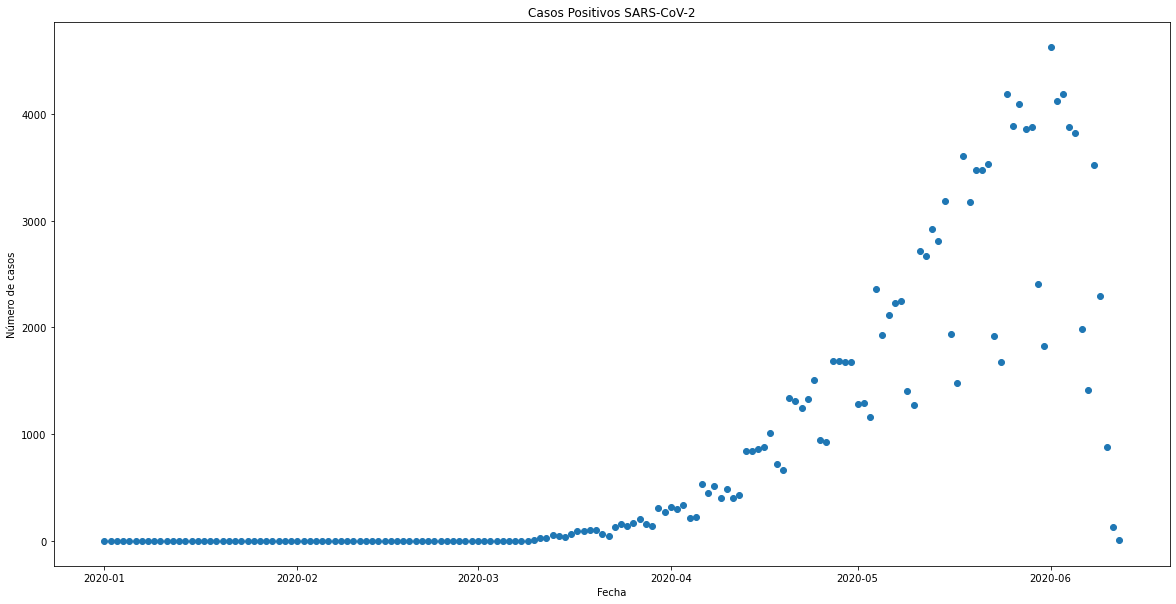

In [35]:
plt.figure(figsize=(20,10))
plt.plot_date(x,y)
plt.title('Casos Positivos SARS-CoV-2')
plt.ylabel('Número de casos')
plt.xlabel('Fecha')

Text(0.5, 0, 'Fecha')

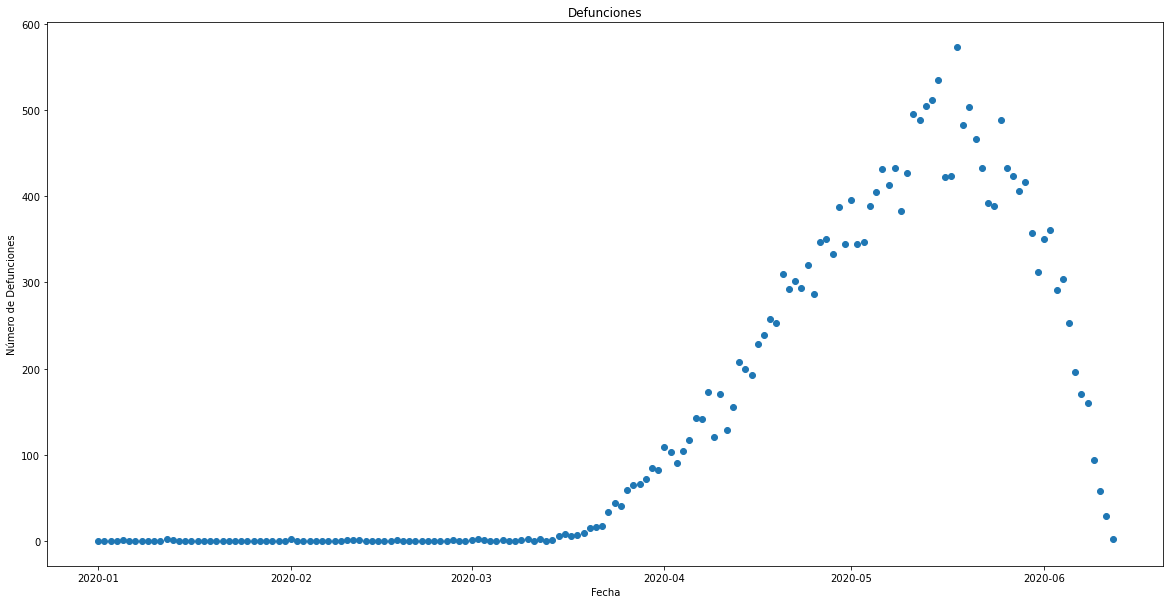

In [39]:
plt.figure(figsize=(20,10))
plt.plot_date(x,z)
plt.title('Defunciones')
plt.ylabel('Número de Defunciones')
plt.xlabel('Fecha')

In [17]:
data['FECHA_INGRESO']

0        2020-06-02
1        2020-05-17
2        2020-06-03
3        2020-06-05
4        2020-06-03
            ...    
393709   2020-04-13
393710   2020-05-14
393711   2020-05-19
393712   2020-05-09
393713   2020-06-03
Name: FECHA_INGRESO, Length: 393714, dtype: datetime64[ns]

In [18]:
###### Contamos el número de casos positivos de COVID en pacientes que tienen alguna otra enfermedad ######
casos_tabaquismo = data['TABAQUISMO+'].sum()
casos_renal = data['RENAL+'].sum()
casos_obesidad = data['OBESIDAD+'].sum()
casos_cardio = data['CARDIOVASCULAR+'].sum()
casos_otras = data['OTRAS_COM+'].sum()
casos_hipertension = data['HIPERTENSION+'].sum()
casos_inmu = data['INMUSUPR+'].sum()
casos_asma = data['ASMA+'].sum()
casos_epoc = data['EPOC+'].sum()
casos_diabetes = data['DIABETES+'].sum()

###### Contamos el número de casos positivos de COVID en pacientes que tienen alguna otra enfermedad ######
bajas_tabaquismo = data['BAJA_TABAQUISMO'].sum()
bajas_renal = data['BAJA_RENAL'].sum()
bajas_obesidad = data['BAJA_OBESIDAD'].sum()
bajas_cardio = data['BAJA_CARDIOVASCULAR'].sum()
bajas_otras = data['BAJA_OTRAS_COM'].sum()
bajas_hipertension = data['BAJA_HIPERTENSION'].sum()
bajas_inmu = data['BAJA_INMUSUPR'].sum()
bajas_asma = data['BAJA_ASMA'].sum()
bajas_epoc = data['BAJA_EPOC'].sum()
bajas_diabetes = data['BAJA_DIABETES'].sum()

In [19]:
enfermedades_dic = {'enfermedades':['TABAQUISMO','RENAL_CRONICA','OBESIDAD',
                                    'CARDIOVASCULAR','OTRAS_COM','HIPERTENSION',
                                    'INMUSUPR','ASMA','EPOC','DIABETES'], 
                    'casos': [casos_tabaquismo,casos_renal,casos_obesidad,
                             casos_cardio, casos_otras,casos_hipertension,
                             casos_inmu, casos_asma,casos_epoc,casos_diabetes],
                   'bajas':[bajas_tabaquismo,bajas_renal,bajas_obesidad,
                           bajas_cardio, bajas_otras, bajas_hipertension,
                           bajas_inmu, bajas_asma, bajas_epoc, bajas_diabetes]}

tabla_enfermedades = pd.DataFrame(enfermedades_dic,columns=['enfermedades','casos','bajas'])
tabla_enfermedades = tabla_enfermedades.sort_values(by='casos', ascending=False)
tabla_enfermedades['taza mortalidad'] = tabla_enfermedades['bajas'] / tabla_enfermedades['casos'] * 100
a = tabla_enfermedades['enfermedades']
b = tabla_enfermedades['casos']
c = tabla_enfermedades['bajas']

In [20]:
tabla_enfermedades

,enfermedades,casos,bajas,taza mortalidad
2,OBESIDAD,64695,5443,8.413324
5,HIPERTENSION,64575,9656,14.953155
9,DIABETES,49358,8527,17.275822
0,TABAQUISMO,34370,2211,6.432936
7,ASMA,13185,487,3.693591
4,OTRAS_COM,12893,1456,11.292950
3,CARDIOVASCULAR,9445,1517,16.061408
1,RENAL_CRONICA,8133,1842,22.648469
8,EPOC,6851,1398,20.405780
6,INMUSUPR,6776,940,13.872491


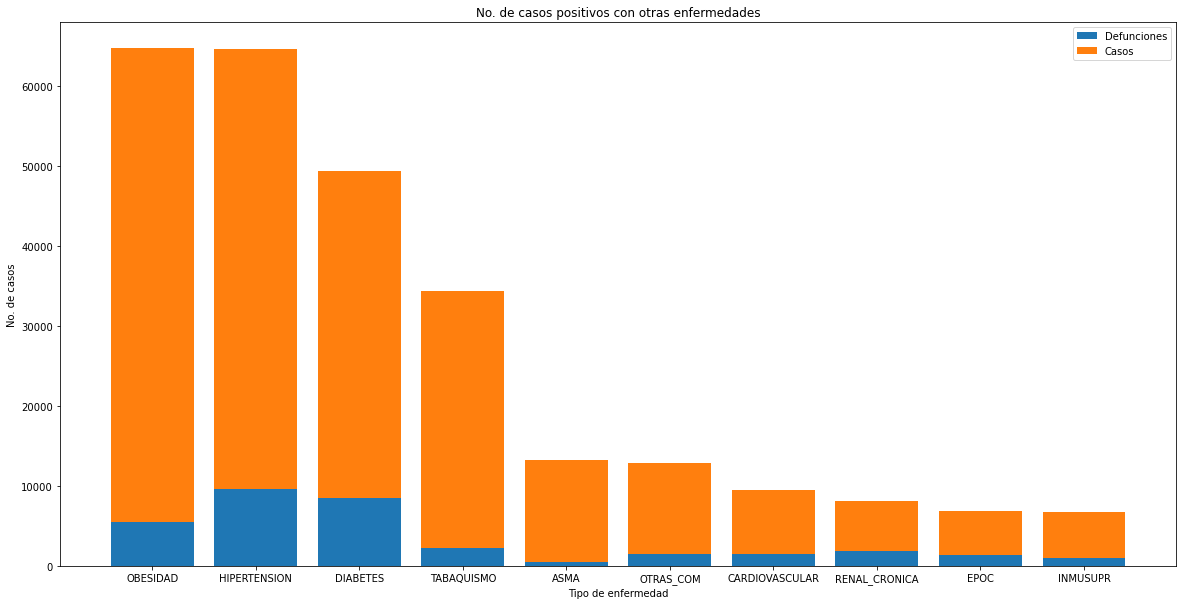

In [21]:
plt.figure(figsize=(20,10))
grafica2 = plt.bar(a,c)
grafica1 = plt.bar(a,b-c,bottom=c)
plt.title('No. de casos positivos con otras enfermedades')
plt.ylabel('No. de casos')
plt.xlabel('Tipo de enfermedad')
plt.legend((grafica2[0], grafica1[0]), ('Defunciones', 'Casos'))